In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [2]:
teams_df = pd.read_csv('data/2025/mens_l2_cn_teams.csv')
teams_df

,Club ID,Club
0,175322,BURLINGTON SC L2 MEN
1,183414,OAKVILLE SC L2 MEN
2,175393,NORTH MISSISSAUGA SC L2 MEN
3,175351,SCROSOPPI FC L2 MEN
4,175735,RUSH CANADA ACADEMY MEN
5,175339,NORTH TORONTO L2 MEN
6,175356,SIGMA FC L2 MEN
7,175369,WOODBRIDGE STRIKERS L2 MEN


In [3]:
scores_df = pd.read_csv('data/2025/2025-06-28_mens_l2_cn_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262603228,2,0,175393,175351
1,262603229,0,0,175322,175356
2,262603230,0,2,175369,183414
3,262603231,0,0,175339,175735
4,262603232,0,2,175351,175339
5,262603233,3,0,175356,175393
6,262603234,0,3,175369,175322
7,262603235,0,0,175735,183414
8,262603236,2,1,175351,175735
9,262603237,1,2,175393,175369


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           BURLINGTON SC L2 MEN  OAKVILLE SC L2 MEN  NORTH MISSISSAUGA SC L2 MEN  SCROSOPPI FC L2 MEN  RUSH CANADA ACADEMY MEN  NORTH TORONTO L2 MEN  SIGMA FC L2 MEN  WOODBRIDGE STRIKERS L2 MEN
262603228                     0                   0                            1                   -1                        0                     0                0                           0
262603229                     1                   0                            0                    0                        0                     0               -1                           0
262603230                     0                   1                            0                    0                        0                     0                0                          -1
262603231                     0                   0                            0                    0                       -1                     1                0                           0
262603232                     

In [6]:
print(X_df.T.to_string())

                             262603228  262603229  262603230  262603231  262603232  262603233  262603234  262603235  262603236  262603237  262603238  262603239  262603240  262603241  262603242  262603243  262603244  262603245  262603246  262603247  262603248  262603249  262603250  262603251  262603252  262603253  262603254  262603255  262603256  262603257  262603258  262603259  262603260  262603261  262603262  262603263  262603264  262603265  262603266  262603267
BURLINGTON SC L2 MEN                 0          1          0          0          0          0          1          0          0          0          1          0          0          0          1          0          0          0          1          0          0          1          0          0         -1          0          0          0          0          1          0          0          0          1          0          0          0          0          1          0
OAKVILLE SC L2 MEN                   0          0          1    

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                             BURLINGTON SC L2 MEN  OAKVILLE SC L2 MEN  NORTH MISSISSAUGA SC L2 MEN  SCROSOPPI FC L2 MEN  RUSH CANADA ACADEMY MEN  NORTH TORONTO L2 MEN  SIGMA FC L2 MEN  WOODBRIDGE STRIKERS L2 MEN
BURLINGTON SC L2 MEN                           10                  -1                           -2                   -1                       -1                    -1               -2                          -2
OAKVILLE SC L2 MEN                             -1                  10                           -1                   -2                       -2                    -1               -1                          -2
NORTH MISSISSAUGA SC L2 MEN                    -2                  -1                           10                   -2                       -1                    -1               -2                          -1
SCROSOPPI FC L2 MEN                            -1                  -2                           -2                   10                       -1        

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                             BURLINGTON SC L2 MEN  OAKVILLE SC L2 MEN  NORTH MISSISSAUGA SC L2 MEN  SCROSOPPI FC L2 MEN  RUSH CANADA ACADEMY MEN  NORTH TORONTO L2 MEN  SIGMA FC L2 MEN  WOODBRIDGE STRIKERS L2 MEN
BURLINGTON SC L2 MEN                           10                  -1                           -2                   -1                       -1                    -1               -2                          -2
OAKVILLE SC L2 MEN                             -1                  10                           -1                   -2                       -2                    -1               -1                          -2
NORTH MISSISSAUGA SC L2 MEN                    -2                  -1                           10                   -2                       -1                    -1               -2                          -1
SCROSOPPI FC L2 MEN                            -1                  -2                           -2                   10                       -1        

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                             GD
BURLINGTON SC L2 MEN         12
OAKVILLE SC L2 MEN           -1
NORTH MISSISSAUGA SC L2 MEN -22
SCROSOPPI FC L2 MEN           4
RUSH CANADA ACADEMY MEN      16
NORTH TORONTO L2 MEN         -2
SIGMA FC L2 MEN              -2
WOODBRIDGE STRIKERS L2 MEN    0


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                             GD with limited blowouts
BURLINGTON SC L2 MEN                               11
OAKVILLE SC L2 MEN                                 -2
NORTH MISSISSAUGA SC L2 MEN                       -20
SCROSOPPI FC L2 MEN                                 4
RUSH CANADA ACADEMY MEN                            12
NORTH TORONTO L2 MEN                               -2
SIGMA FC L2 MEN                                     0
WOODBRIDGE STRIKERS L2 MEN                          0


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                             massey_rating
RUSH CANADA ACADEMY MEN           1.430055
BURLINGTON SC L2 MEN              0.867585
SCROSOPPI FC L2 MEN               0.185739
OAKVILLE SC L2 MEN                0.033928
NORTH TORONTO L2 MEN             -0.060739
WOODBRIDGE STRIKERS L2 MEN       -0.242585
SIGMA FC L2 MEN                  -0.283928
NORTH MISSISSAUGA SC L2 MEN      -1.930055


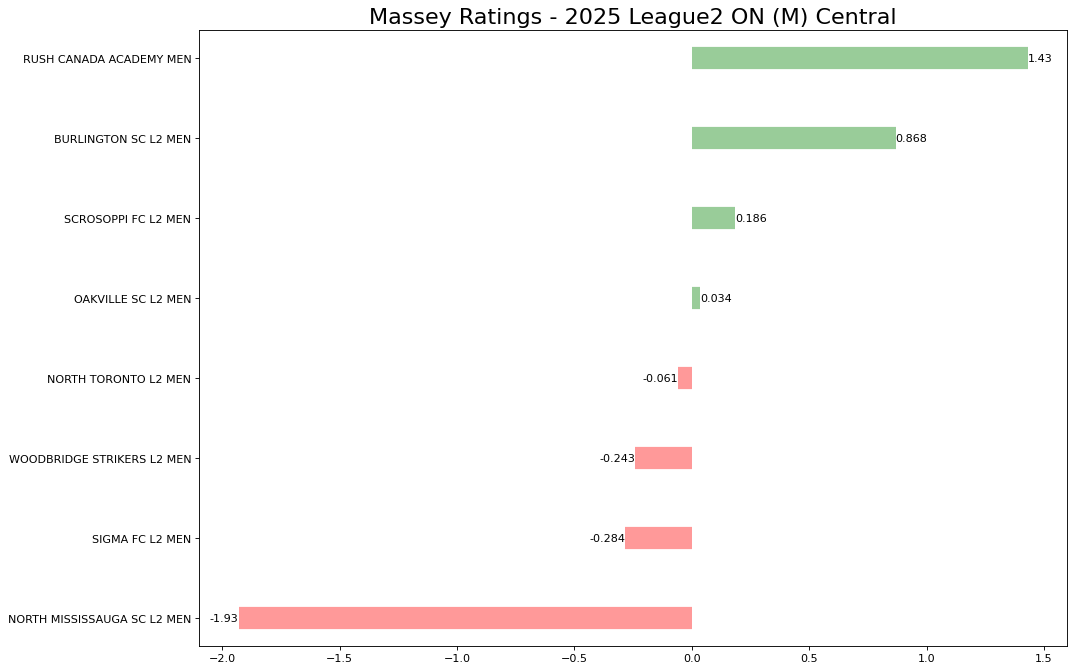

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Central', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                             massey_rating
RUSH CANADA ACADEMY MEN           1.067240
BURLINGTON SC L2 MEN              0.824435
SCROSOPPI FC L2 MEN               0.192136
NORTH TORONTO L2 MEN             -0.075469
OAKVILLE SC L2 MEN               -0.077127
SIGMA FC L2 MEN                  -0.089540
WOODBRIDGE STRIKERS L2 MEN       -0.107768
NORTH MISSISSAUGA SC L2 MEN      -1.733906


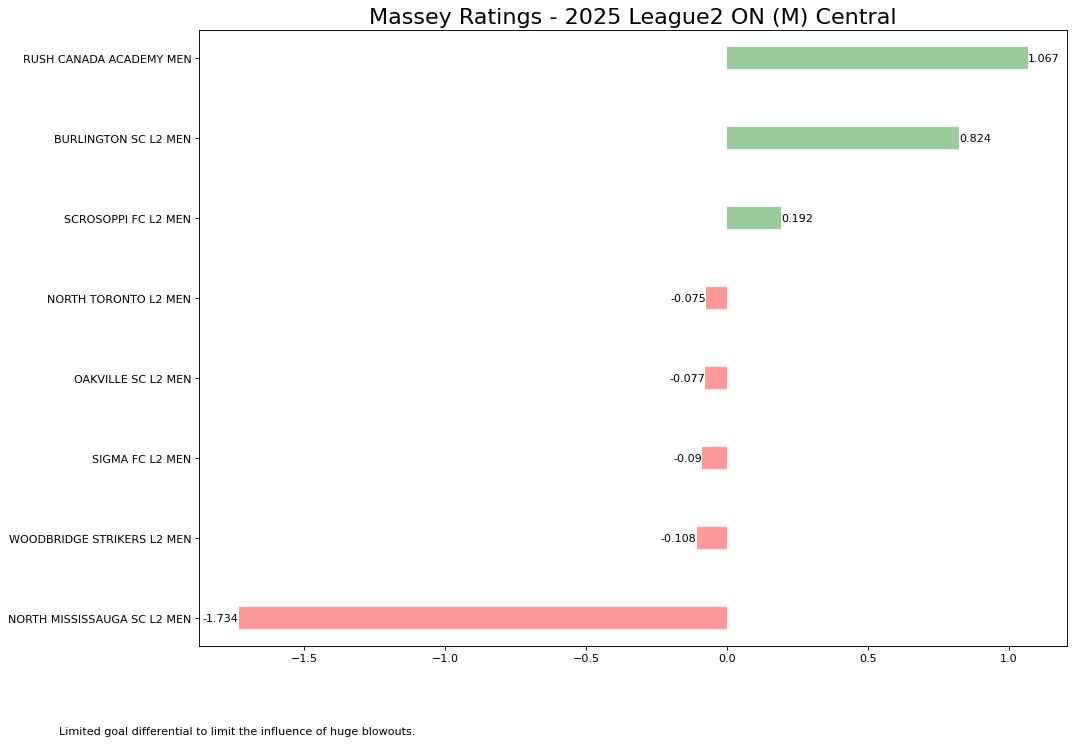

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Central', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()